In [2]:
from netCDF4 import Dataset
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [9]:
nc = Dataset('../../measurements/bathymetry/erie_lld.grd')

In [ ]:
# topo = -nc.variables['z'][:] #[::10,::10]
# x = nc.variables['x'][:] #[::10]
# y = nc.variables['y'][:] #[::10]
# lon_0 = x.mean()
# lat_0 = y.mean()
# lon, lat = np.meshgrid(x, y)
m = Basemap(width=5000000*2*0.8,height=300000*0.8, resolution='h',projection='stere',lat_0=lat_0+0.2,lon_0=lat_0-0.2)
# x, y = m(lon, lat)

In [14]:
import cmocean

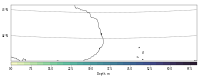

In [15]:
# 


levels1 = np.linspace(0,70,14*2+1)
levels2 = np.linspace(0,70,14+1)
# levels2 = np.linspace(-10,0,14*2+1)
plt.figure(figsize=(12,6), dpi=20)

# m.shadedrelief()
# m.drawstates()
# m.drawrivers()
m.drawcoastlines()
m.drawparallels(np.arange(41., 44, 1.),labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-84., -78., 1.),labels=[0,0,1,0], fontsize=10)
# cs = m.pcolor(x,y,np.squeeze(topo), cmap=cmocean.cm.deep)
# ax.set_ylim(*[41,43])
cax = m.contourf(x,y,topo, levels=levels1,cmap=cmocean.cm.deep)
plt.contour(x,y,topo, levels=levels1, colors='k')  # negative contours will be dashed by default
                 
# c = m.contourf(x,y,topo, levels=levels2,cmap=cmocean.cm.solar)
cbar = m.colorbar(cax,location='bottom')

# cbar = m.colorbar(cs, location='bottom')
cbar.set_label('Depth, m')
plt.show()
# plt.savefig('Bathymetry.png')


In [7]:
lat_0

42.0

In [8]:
lon_0

-81.0

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
import gdal

In [14]:


# raster = gdal.Open('ice/grid2011/g20110202.ct')
# band = raster.GetRasterBand(1)
# array = band.ReadAsArray()
# plt.imshow(array)

AttributeError: 'NoneType' object has no attribute 'GetRasterBand'

In [6]:
c={}
import numpy as np
from osgeo import gdal
ds = gdal.Open("../../measurements/bathymetry/eastern.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
for d in np.linspace(0,64.5,65/0.5):
    neg = x[x<-d]
    c[d] = -neg.sum(axis=0)/0.5
c

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


{0.0: 54046852.0,
 0.5: 54038312.0,
 1.0: 54029692.0,
 1.5: 54016760.0,
 2.0: 54001968.0,
 2.5: 53979336.0,
 3.0: 53952776.0,
 3.5: 53915124.0,
 4.0: 53873812.0,
 4.5: 53815436.0,
 5.0: 53749456.0,
 5.5: 53670244.0,
 6.0: 53588456.0,
 6.5: 53488316.0,
 7.0: 53372964.0,
 7.5: 53217464.0,
 8.0: 53030104.0,
 8.5: 52806396.0,
 9.0: 52616732.0,
 9.5: 52409288.0,
 10.0: 52214444.0,
 10.5: 52006172.0,
 11.0: 51801484.0,
 11.5: 51551316.0,
 12.0: 51292504.0,
 12.5: 50985256.0,
 13.0: 50701060.0,
 13.5: 50216284.0,
 14.0: 49799576.0,
 14.5: 49267284.0,
 15.0: 48852624.0,
 15.5: 48276568.0,
 16.0: 47724716.0,
 16.5: 46904020.0,
 17.0: 46154136.0,
 17.5: 45074808.0,
 18.0: 44249712.0,
 18.5: 43136368.0,
 19.0: 42363168.0,
 19.5: 41450152.0,
 20.0: 40638768.0,
 20.5: 39807192.0,
 21.0: 39040428.0,
 21.5: 38237076.0,
 22.0: 37647024.0,
 22.5: 36817040.0,
 23.0: 36039336.0,
 23.5: 35462412.0,
 24.0: 35046584.0,
 24.5: 34561960.0,
 25.0: 34107236.0,
 25.5: 33346426.0,
 26.0: 32829700.0,
 26.5: 322933

In [17]:
depths[::-1]

NameError: name 'depths' is not defined

In [31]:
e_vol=np.array([])
import numpy as np
import gdal
ds = gdal.Open("../../measurements/bathymetry/western.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
e = neg.sum(axis=0)
depths = np.linspace(0,63,63.5/0.5)
prev_volume_below_d = 0
for d in depths:
    neg = x[x<=-d]+d
    e_vol = np.append(e_vol,  -neg.sum()*(111.32*0.865*0.0008333333*1000)**2 )
# e_vol = np.array(e_vol)[1:]-np.array(e_vol)[:-1]
# e_vol

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


# This how you estimate area

In [32]:
(e_vol[0] - e_vol[1])/0.5*1e-9

2.842919073191399

In [9]:
e_vol.sum()*1e-9

10846.492564799159

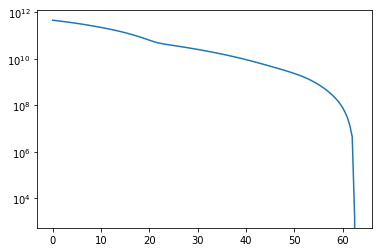

In [10]:
plt.semilogy(depths, e_vol) 

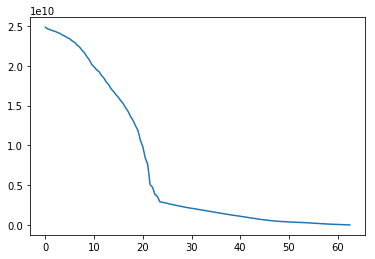

In [11]:
plt.plot(depths[:-1], -np.diff(e_vol)/0.5)

### This is the volume of layers of lake Erie (eastern basin) with 0.5 step in depth np.linspace(0,63,63.5/0.5)

In [4]:
e_vol=np.array([])
import numpy as np
import gdal
ds = gdal.Open("../../measurements/bathymetry/eastern.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
e = neg.sum(axis=0)
depths = np.linspace(0,63.0,127)
prev_volume_below_d = 0
for d in depths:
    neg = x[x<=-d]+d
    e_vol = np.append(e_vol,  -neg.sum()*(111.32*0.85*0.0008333333*1000)**2 )
# e_vol = np.array(e_vol)[1:]-np.array(e_vol)[:-1]
# e_vol

In [5]:
e_vol

array([ 1.68020444e+11,  1.64565071e+11,  1.61146481e+11,  1.57742030e+11,
        1.54353434e+11,  1.50977434e+11,  1.47618024e+11,  1.44273149e+11,
        1.40947276e+11,  1.37638390e+11,  1.34352943e+11,  1.31087393e+11,
        1.27846887e+11,  1.24627285e+11,  1.21435538e+11,  1.18268685e+11,
        1.15141974e+11,  1.12050317e+11,  1.09001226e+11,  1.05982962e+11,
        1.03000597e+11,  1.00046965e+11,  9.71264907e+10,  9.42341697e+10,
        9.13795708e+10,  8.85574588e+10,  8.57756678e+10,  8.30294228e+10,
        8.03454841e+10,  7.77060448e+10,  7.51244973e+10,  7.25868460e+10,
        7.01123032e+10,  6.76925746e+10,  6.53586985e+10,  6.30903929e+10,
        6.09247833e+10,  5.88258945e+10,  5.68231296e+10,  5.48777530e+10,
        5.30133853e+10,  5.12034277e+10,  4.94625133e+10,  4.77733665e+10,
        4.61397427e+10,  4.45470368e+10,  4.30227306e+10,  4.15381610e+10,
        4.00891187e+10,  3.86663176e+10,  3.72757828e+10,  3.59147783e+10,
        3.46008379e+10,  

In [110]:
(20/5787+290/6357+170/6237)/60/60/24/365*1e+9

0.10958974247024221

In [93]:
(e_vol[0]-e_vol[1])/0.5*1e-6

2745.1756228150402

In [100]:
290/0.0183

15846.994535519125

In [99]:
20/0.0074

2702.7027027027025

In [98]:
170/0.024

7083.333333333333

In [107]:
5780 + 6360 + 6240

18380

In [124]:
tau = 2.4
z_av = 19
sigma = 8/z_av
tau/(1 + tau*sigma)

1.1937172774869111

In [ ]:
tau = 2.4
z_av = 19
sigma = 8/z_av
TP = 

0.0902439024390244

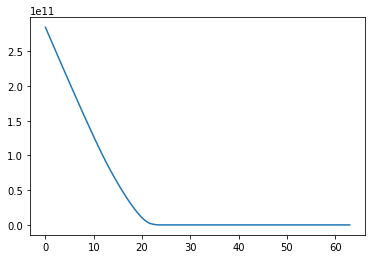

In [51]:
plt.plot(depths, e_vol)

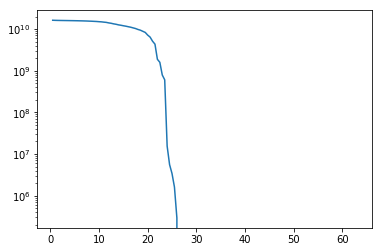

In [52]:
plt.semilogy(depths[1:], -np.diff(e_vol)/0.5 )

In [53]:
(-np.diff(e_vol)).sum()*1e-9

284.7521297217806

In [42]:
e_vol=np.array([])
import numpy as np
import gdal
ds = gdal.Open("../../measurements/bathymetry/western.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
e = neg.sum(axis=0)
depths = np.linspace(0,63.0,127)
prev_volume_below_d = 0
for d in depths:
    neg = x[x<-d]
    e_vol = np.append(e_vol,  -neg.sum(axis=0)*0.75*(111.32*0.0008333333*1000)**2 )
# e_vol = np.array(e_vol)[1:]-np.array(e_vol)[:-1]
# e_vol

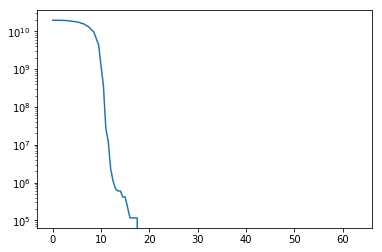

In [43]:
plt.semilogy(depths, e_vol)

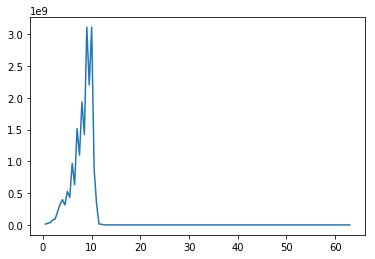

In [44]:
plt.plot(depths[1:], -np.diff(e_vol) )

In [ ]:
dataset = ds

In [ ]:
c+e+w

In [ ]:
import numpy as np
from osgeo import gdal
ds = gdal.Open("../../measurements/bathymetry/erie_lld.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
pos.sum(axis=0)
neg.sum(axis=0)

In [ ]:
(x<=0).sum()

In [ ]:
dataset=ds

In [ ]:
band = dataset.GetRasterBand(1)
print("Band Type={}".format(gdal.GetDataTypeName(band.DataType)))
      
min = band.GetMinimum()
max = band.GetMaximum()
if not min or not max:
    (min,max) = band.ComputeRasterMinMax(True)
print("Min={:.3f}, Max={:.3f}".format(min,max))
      
if band.GetOverviewCount() > 0:
    print("Band has {} overviews".format(band.GetOverviewCount()))
      
if band.GetRasterColorTable():
    print("Band has a color table with {} entries".format(band.GetRasterColorTable().GetCount()))

In [ ]:
print("Driver: {}/{}".format(dataset.GetDriver().ShortName,
                             dataset.GetDriver().LongName))
print("Size is {} x {} x {}".format(dataset.RasterXSize,
                                    dataset.RasterYSize,
                                    dataset.RasterCount))
print("Projection is {}".format(dataset.GetProjection()))
geotransform = dataset.GetGeoTransform()
if geotransform:
    print("Origin = ({}, {})".format(geotransform[0], geotransform[3]))
    print("Pixel Size = ({}, {})".format(geotransform[1], geotransform[5]))

In [ ]:
e*1e-9*0.75*(111.32*0.0008333333*1000)**2

In [ ]:
scanline = band.ReadRaster(xoff=0, yoff=0,
                           xsize=band.XSize, ysize=1,
                           buf_xsize=band.XSize, buf_ysize=1,
                           buf_type=gdal.GDT_Float32)

In [ ]:
import struct
tuple_of_floats = struct.unpack('f' * band.XSize, scanline)

In [ ]:
print('{:.8f}'.format((np.array(tuple_of_floats) - tuple_of_floats[0])[4]))

### Lake Ontario

In [ ]:
import numpy as np
from osgeo import gdal
ds = gdal.Open("../../measurements/bathymetry/ontario_lld.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
pos.sum(axis=0)
neg.sum(axis=0)

In [ ]:
dataset=ds

In [ ]:
band = dataset.GetRasterBand(1)
print("Band Type={}".format(gdal.GetDataTypeName(band.DataType)))
      
min = band.GetMinimum()
max = band.GetMaximum()
if not min or not max:
    (min,max) = band.ComputeRasterMinMax(True)
print("Min={:.3f}, Max={:.3f}".format(min,max))
      
if band.GetOverviewCount() > 0:
    print("Band has {} overviews".format(band.GetOverviewCount()))
      
if band.GetRasterColorTable():
    print("Band has a color table with {} entries".format(band.GetRasterColorTable().GetCount()))

In [ ]:
print("Driver: {}/{}".format(dataset.GetDriver().ShortName,
                             dataset.GetDriver().LongName))
print("Size is {} x {} x {}".format(dataset.RasterXSize,
                                    dataset.RasterYSize,
                                    dataset.RasterCount))
print("Projection is {}".format(dataset.GetProjection()))
geotransform = dataset.GetGeoTransform()
if geotransform:
    print("Origin = ({}, {})".format(geotransform[0], geotransform[3]))
    print("Pixel Size = ({}, {})".format(geotransform[1], geotransform[5]))

In [ ]:
e_vol=np.array([])
import numpy as np
import gdal
ds = gdal.Open("../../measurements/bathymetry/ontario_lld.grd")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
depths = np.linspace(0,250,501)
for d in depths:
    neg = x[x<=-d]+d
    e_vol = np.append(e_vol,  -neg.sum()*(111.32*0.85*0.0008333333*1000)**2 )
# e_vol = np.array(e_vol)[1:]-np.array(e_vol)[:-1]
# e_vol

In [ ]:
-np.diff(e_vol)/0.5